<a href="https://colab.research.google.com/github/Rob-Whelan/sam2/blob/main/SAM_II_Lab3_Factorial_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FACTORIAL BETWEEN SUBJECTS ANOVA**

**Learning objectives**

*   Load data relating to a factorial design
*   Be able to plot these data graphically and determine if a potential interaction exists
*	Identifying and calculating the main components that are used in the computation of a Factorial ANOVA
  
    -error term (within subjects variance)

    -both between subjects terms

    -interaction term using the concept of SScells

*	Completing the ANOVA table for a Factorial ANOVA
*	Computing a Factorial ANOVA directly using statsmodels


The previous lab dealt with a research design that involved one factor only. Unfortunately, things are rarely that 'simple'. Today we will address the additional complication of adding a second between subjects' factor to the experimental design. We will also calculate some individual components of the formulae to demonstrate how the different sources of variance are calculated.

**HYPOTHETICAL RESEARCH EXAMPLE**

Researchers were commissioned to determine if two new anti-hay fever drugs had an impact on driving performance. Since the drugs had different physiological processes it was thought that they might have different impacts on drivers who were fresh and responsive, compared to drivers who were tired. The variables involved in this study are formally stated below:

•	**Drug Level**:
-	Placebo
-	Drug A
-	Drug B

•	**Participant Alertness**:
-	Fresh - participants were tested after rising from a night’s sleep 
-	Tired - participants were tested after 24 hrs sleep deprivation

•	**Driver Responsiveness** measured through driving simulation (scored on a scale of 0-30 where 30 indicates excellent responsiveness)


The testing procedure involved 60 participants consuming a flavoured drink that contained one of the three Drug Levels. They were then tested on a driving simulation task 10 minutes later. The data that could have been generated from such an experiment can be loaded below. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chiaracc/SAMII/main/SaM_II_Lab_data_csv%20-%20Sheet1.csv', index_col=0) # Read in the data, the first column is the participant code, the first line is the name of the columns
df # This shows the data in a neat table

# Pandas reads the first line as the index automatically, so it's infering header=0 if nothing is specified. header=None should be used when the first line does not contain the columns' names

,Drug,Alterness,Driving_responsiveness
Participant_number,,,
1,Placebo,Fresh,24
2,Placebo,Fresh,25
3,Placebo,Fresh,13
4,Placebo,Fresh,22
5,Placebo,Fresh,16
6,Placebo,Fresh,23
7,Placebo,Fresh,18
8,Placebo,Fresh,19
9,Placebo,Fresh,24


**Q1a.**	One of the complexities of performing a factorial ANOVA is identifying the different sources of variation within the data set.
* How many different experimental cells are there in this data set?
* What method, other than counting the number of subgroups, should you use to arrive at your answer?

*An experimental cell can be best thought of as a unique experimental condition produced by a specific combination of levels of the factors that make up the research design.*

In [ ]:
#your answers here

**Q1b.** If the study was changed such that there were 4 drug conditions and 3 alertness conditions how many unique experimental cells would there now be?

In [ ]:
#your answer here

In your last lab class (One-way Between Subjects ANOVA) the participants were placed in one of three groups based on the mnemonic strategy they were advised to use. The first group were asked to use no strategy, and therefore was the control group. The second group used mnemonic strategy 'A', while the third used mnemonic strategy 'B'. Today's data is structured in a slightly more complicated way in that each participant must be identified in terms of both variables that make up the Experiment. So, for example, all those participants in the first experimental cell depicted in the dataframe:

Drug = Placebo, Alertness = Fresh. 

**Q2.** What two  labels would be required to identify a participant that had been administered Drug B, and had just received a good night’s sleep (Fresh)?


In [15]:
#what would you type to show the data for people with Drug B and Fresh? I need to re 

#print(df.loc['Drug'=='Drug B'] & df.loc['Alterness'=='Fresh'])


KeyError: ignored

**Descriptive statistics**

Generate boxplots to get an impression of the distributions within your data. For the purposes of trying to establish trends it is useful if an individual boxplot is generated for each experimental cell.

Each one of the boxplots produced will represent an experimental cell allowing you to establish if the data change across experimental cells.


This can be done using this code: 

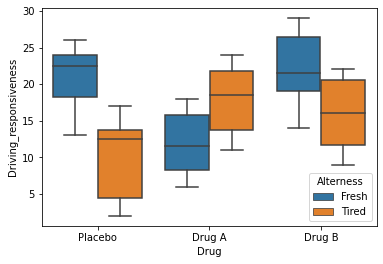

In [16]:
# Generate a boxplot to see the data distribution by drug type and sleep. Using boxplot, we can easily observe the 
# differences between different cells

sns.boxplot(x="Drug", y="Driving_responsiveness", hue="Alterness", data=df)

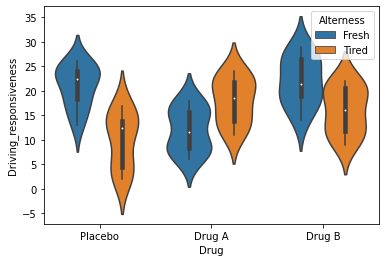

In [17]:
# Explore a different type of plot: violin plot. It shows similar information as the boxplot.

sns.violinplot(x="Drug", y="Driving_responsiveness", hue="Alterness", data=df)




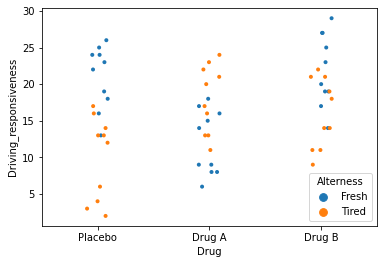

In [18]:
# Explore a different type of plot: strip plot. It useful to spot outliers.
ax = sns.stripplot(x="Drug", y="Driving_responsiveness", hue="Alterness", data=df, edgecolor="white", size=4, jitter=1)


**Q3a.** Are there any outliers among these data that might be unduly influencing our results, and subjectively is the variance in each experimental cell similar (thus complying with the parametric assumption of homogeneity of variance)?

In [ ]:
#Your answer here

Generating a line graph – is there a possible interaction?
The graphical depiction which best facilitates the detection of a possible interaction is a line graph. This can easily be produced through with the following code: 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


AttributeError: ignored

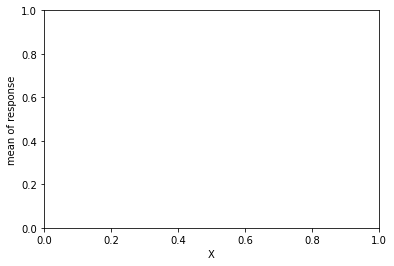

In [19]:
# Using a line plot, we can easily detect possible interactions 

from statsmodels.graphics.factorplots import interaction_plot

interaction_plot('Drug', 'Alterness', 'Driving_responsiveness', data=df)




You should see from the graph that there is a potential interaction. If you can understand the pattern of results here it will assist you in your future analyses. To help you appreciate the pattern in your data think through these questions:

*	Are the results for the placebo and drugB conditions what you would expect, given that fresh participants should perform better than tired?
*	Does the Drug A condition conform to this expectation?

**Q4.**	Describe the impact of alertness level of each of the three drug groups and in doing so state whether you think these data contain a possible interaction.


In [ ]:
#Your answer here

MAIN COMPONENTS OF THE FACTORIAL ANOVA
*	*MSbetween* for Drug Level - shortened to MSD
*	*MSbetwee*n for Participant Alertness - shortened to MSA
*	*MSinteraction* for interaction between variables D & A - shorten to MSDA 
*	*MScells* variance between all the experimental cells
*	*MSerror* calculated on the basis of the average variance within the experimental cells

**The error term**

Equation 0.1 below, which, lays out the full definitional formula for the error term.

 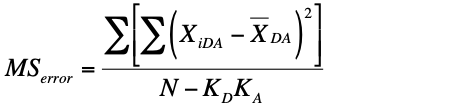

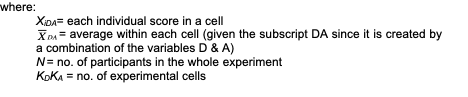

Equation 1 is actually simpler than it looks. It is similar to the definitional formula for variance as reproduced in Equation 2

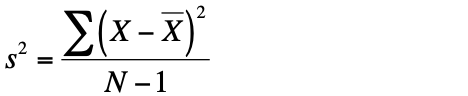

The main difference is that in Equation 1 because there are several cell means, you must use a label to identify the variable combination that produced each cell.

This definitional formula helps us understand what is being measured but it makes the calculation excessively cumbersome. Therefore, for the sake of expediency the results (sums of squares) for each experimental cell are provided below:

D1A1=166, D1A2=288, D2A1=176, D2A2=194, D3A1=220, D3A2=206


**Q5.**	Add the values given to you above for the six experimental cells and then divide this sum by the denominator identified in Equation 1 to produce the MSerror


In [25]:
example_calc=(100+200+300+400)/2
print('Example result: ' + str(example_calc))


#Your answer here

#MSerror =

Example result: 500.0


Between subjects variance for Drug variable - MSD 

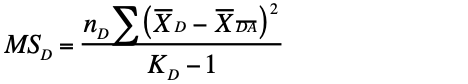

Equation 3

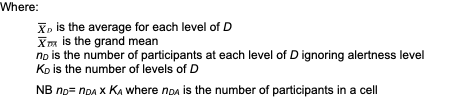

**Q6a.**	Fill in the values below to calculate the ‘Sigma’ part of Equation 0.3.

*	To do this you will need to calculate the grand mean and the mean of each of the levels of D ignoring A. Remember, to produce statistics based on each level


In [ ]:
# Example for one level
df.groupby(['Drug']).mean()

,Driving_responsiveness
Drug,
Drug A,15.0
Drug B,19.0
Placebo,15.5


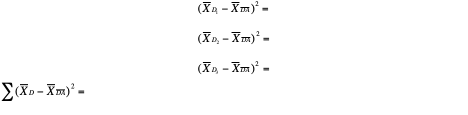

**Q6b.**	Look at Table 0.1 again and determine how many participants are represented at each Drug Level. Consequently, identify the value nD takes here

In [ ]:
#your answer here

**Q6c.**	Multiply the answer for 6a with the answer to 6b to get SSD 

In [ ]:
#your answer here

**Q6d.**	You now have all the values required to complete Equation 3. Insert the appropriate values and calculate MSD. 

In [ ]:
#your answer here

**Between subjects variance for Alertness variable - MSA**

  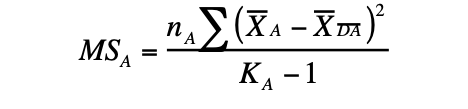

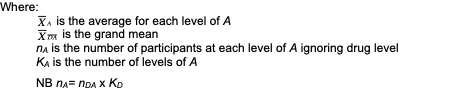

**Q7a.** Fill in the values below:

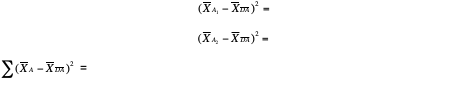

In [ ]:
#your answers to the 3 equations below

**Q7b.**	Look at the dataframe again and determine how many participants are represented at each Alertness Level. Consequently, identify the value nA takes here 

In [ ]:
#your answer here

**Q7c.**	Multiply the answer for 7a with the answer to 7b to get SSA 

In [ ]:
#your answer here

**Q7d.**	You now have all the values required to complete Equation 4. Insert the appropriate values and calculate MSA. 

In [ ]:
#your answer here

**The Interaction term – MSDA**
The total variation in the experiment can be broken down into 2 main parts:

*SStotal = SSerror + SScells*

The SScells can be further broken down in terms of its components as shown below where SSDA is the mean square for the interaction:


*SScells = SSD + SSA + SSDA*


We want to calculate SSDA (the interaction term) and we can do this by calculating SScells after rearranging the terms in the equation to get SSDA on the left. We can do this by rearranging the line above to move SSD and SSA to the other side of the equal sign (and therefore changing sign from plus to minus in the process)

*SScells - SSD - SSA = SSDA*

Rearrange again to put SSDA on the left (this is really just for convenience)

*SSDA = SScells - SSD - SSA*

We have already calculated SSD and SSA while calculating the MS terms. However, to calculate SScells we have to produce a new formula as presented below.

Calculating SScells

The best way to think of SSCells is the between subjects variation between all the experimental cells, as if it was one variable with 6 levels.


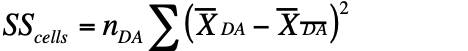

Where:
nDA = the number of participants in each experimental cell
  = the average in each experimental cell

**Q8a.**	Compute the average for each cell by splitting the file according to both variables. Subtract the grand mean and enter the answers in the relevant section below.


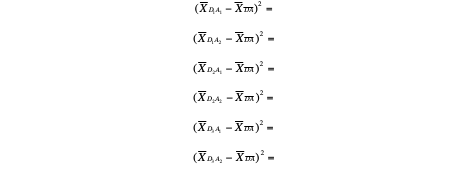

**Q8b.**	Put these values into the Equation above and calculate SSCells .

In [ ]:
#your answer here

**Q8c.**	We have calculated SSD in 6c above and SSA in 7c above and therefore have all the necessary values to complete the equation above. Insert the values and calculate SSDA.

In [ ]:
#your answer here

**Q8d.** Use the answer in 8c above and the equation below to determine what the interaction term should be.

MSDA = SSDA/(KD-1)(KA-1)

In [ ]:
#your answer here

**Completing the ANOVA table**

Calculating df
* any variable = K-1
* an interaction = (KD -1)(KA-1)
* error term = N-KDKA

Completing the table
You should now have all the elements that make up the ANOVA table given that:

F= MSbetween / MSerror

and 

MS = SS/df


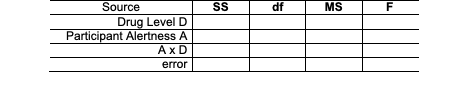

In [ ]:
#write your answers out here

#Drug Level D - SS

#Drug Level D - df

#etc.

**Performing a factorial ANOVA directly**

You should now check your results using the factorial ANOVA function directly.

In [ ]:
# Run ANOVA using statsmodel approach

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Driving_responsiveness ~ C(Alterness) + C(Drug) + C(Alterness):C(Drug)', data=df).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Alterness),201.666667,1.0,8.712,0.004669
C(Drug),190.000000,2.0,4.104,0.021917
C(Alterness):C(Drug),763.333333,2.0,16.488,0.000003
Residual,1250.000000,54.0,NaN,NaN
